# Homwork 2 - marketing strategy
## Year Birth

Interpretation:
- Lorem Ipsum
- Maybe remove outliers
- do I first have to group the data?

In [77]:
import pandas as pd
marketing_data = pd.read_csv('marketing_campaign.csv', sep="\t")
mnt = marketing_data.filter(regex='^Mnt.*')
mnt = pd.concat([marketing_data['ID'], mnt], axis=1)
num = marketing_data.filter(regex='^Num.*')
num = pd.concat([marketing_data['ID'], num], axis=1)
marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [78]:
from sklearn.cluster import KMeans

data = pd.concat([marketing_data['Year_Birth'], mnt['MntMeatProducts']], axis=1)
wcss = []
for i in range (1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

In [79]:
data = data.groupby(by = 'Year_Birth').mean()
data

,MntMeatProducts
Year_Birth,
1893,5.000000
1899,562.000000
1900,8.000000
1940,7.000000
1941,716.000000
1943,304.857143
1944,274.857143
1945,301.625000
1946,185.187500


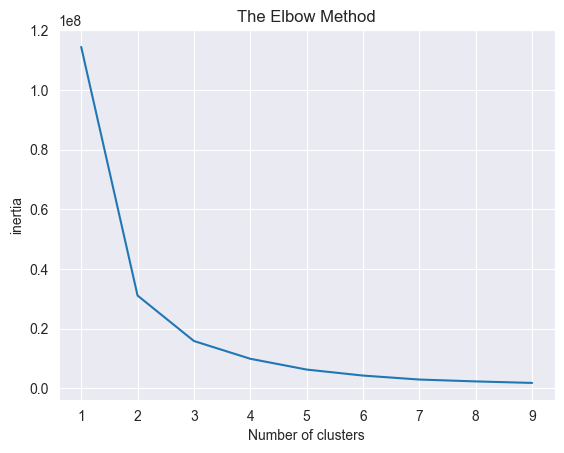

In [80]:
import matplotlib.pyplot as plt

plt.plot(range(1, 10), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.show()

In [81]:
import seaborn as sns

kmeans = KMeans(n_clusters=3).fit(data)
data['Label'] = kmeans.labels_
plt.figure(figsize=(5,5))

sns.scatterplot(x=data['Year_Birth'],
                y=data['MntMeatProducts'],
                hue=data['Label'],
                palette=sns.color_palette('hls', 3))
plt.title('k-means with 3 clusters')
plt.show()

KeyError: 'Year_Birth'

<Figure size 500x500 with 0 Axes>

In [ ]:
from sklearn.cluster import KMeans

data = pd.concat([marketing_data['Year_Birth'], num['NumWebPurchases']], axis=1)
wcss = []
for i in range (1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, 10), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.show()

In [ ]:
import seaborn as sns

kmeans = KMeans(n_clusters=3).fit(data)
data['Label'] = kmeans.labels_
plt.figure(figsize=(5,5))

sns.scatterplot(x=data['Year_Birth'],
                y=data['NumWebPurchases'],
                hue=data['Label'],
                palette=sns.color_palette('hls', 3))
plt.title('k-means with 3 clusters')
plt.show()